## Import Files and Packages

In [2]:
import pandas as pd
import numpy as np

In [5]:
# Define file paths
concentrations_path = "RCMIP_ScenarioInputs/rcmip-concentrations-annual-means-v5-1-0.csv"
emissions_path = "RCMIP_ScenarioInputs/rcmip-emissions-annual-means-v5-1-0.csv"
forcing_path = "RCMIP_ScenarioInputs/rcmip-radiative-forcing-annual-means-v5-1-0.csv"

# Read CSVs as DataFrames
df_conc = pd.read_csv(concentrations_path)
df_emis = pd.read_csv(emissions_path)
df_forc = pd.read_csv(forcing_path)

## Visualization Function

In [45]:
import matplotlib.pyplot as plt

def plot_scenario_comparison(df, scenario_variable, scenario=None):
    """
    Plots the time series for a selected scenario variable.
    
    Parameters:
        df (pd.DataFrame): The filtered DataFrame.
        scenario_variable (str): The scenario variable to plot (e.g., "Emissions|CO2").
        scenario (str, optional): The scenario to filter by.
    """
    # Filter for the selected scenario variable
    df_scenario = df[df['Variable'] == scenario_variable]

    # Filter by scenario if specified
    if scenario is not None:
        df_scenario = df_scenario[df_scenario['Scenario'] == scenario]

    # Get year columns
    year_cols = [col for col in df_scenario.columns if col.isdigit()]
    years = [int(col) for col in year_cols]
    
    plt.figure(figsize=(12, 6))
    
    for key, grp in df_scenario.groupby('Scenario'):
        y = grp[year_cols].values.squeeze()
        if y.ndim == 1:
            mask = ~pd.isna(y)
            if mask.any():
                plt.plot(np.array(years)[mask], y[mask])
                last_valid_idx = np.where(mask)[0][-1]
                plt.text(years[last_valid_idx], y[last_valid_idx], str(key), fontsize=9, va='center')
        else:
            for row in y:
                mask = ~pd.isna(row)
                if mask.any():
                    plt.plot(np.array(years)[mask], row[mask])
                    last_valid_idx = np.where(mask)[0][-1]
                    plt.text(years[last_valid_idx], row[last_valid_idx], str(key), fontsize=9, va='center')

    plt.xlabel('Year')
    plt.ylabel(f"{scenario_variable} ({df_scenario['Unit'].iloc[0]})")
    plt.title(f"{scenario_variable} by Scenario")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)
    plt.xlim(years[0], years[-1] + 5)  # Extend x-axis for labels
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)    # Remove left border
    ax.spines['bottom'].set_visible(False)  # Remove bottom border
    plt.show()


## Filter Concentrations

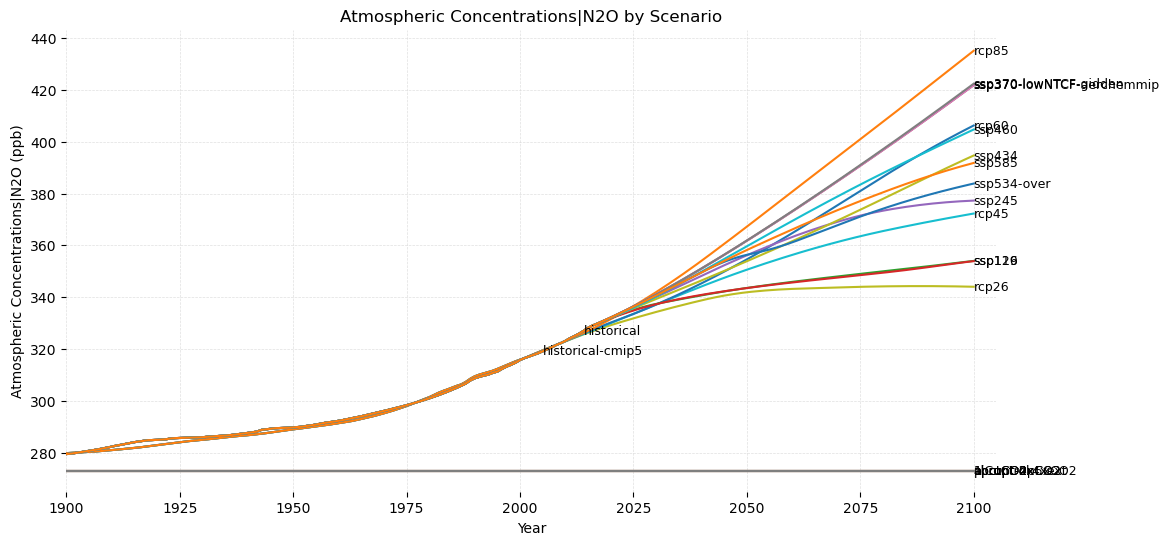

In [48]:
# List of variables to keep
variables_to_keep = [
    "Atmospheric Concentrations|N2O",
    "Atmospheric Concentrations|CH4",
    "Atmospheric Concentrations|CO2"
]

# Filter the DataFrame by variable
df_conc_filtered = df_conc[df_conc['Variable'].isin(variables_to_keep)]

# Filter the DataFrame by region
df_conc_filtered = df_conc_filtered[df_conc_filtered['Region'] == 'World']

# Define year range
start_year = 1900
end_year = 2100

# Get columns that are years within the range, plus any identifier columns you want to keep
year_columns = [str(year) for year in range(start_year, end_year + 1)]
identifier_columns = ['Model', 'Scenario', 'Region', 'Variable', 'Unit']  # adjust as needed

# Only keep columns that exist in the DataFrame
columns_to_keep = [col for col in identifier_columns if col in df_conc_filtered.columns] + \
                  [col for col in year_columns if col in df_conc_filtered.columns]

df_conc_filtered = df_conc_filtered[columns_to_keep]

# Display the filtered DataFrame
#print("Filtered Concentrations (1900-2100):")
#display(df_conc_filtered)

#Visualize
# To compare CO2 emissions for scenario "rcp60"
plot_scenario_comparison(df_conc_filtered, "Atmospheric Concentrations|N2O")

## Filter Emissions

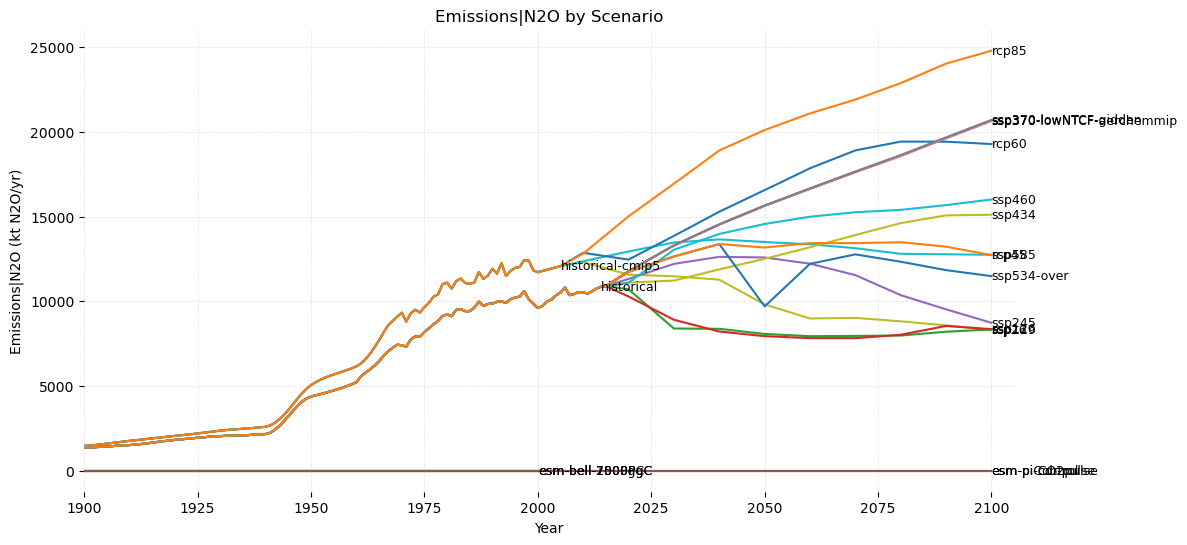

In [49]:
# List of variables to keep
variables_to_keep = [
    "Emissions|N2O",
    "Emissions|CH4",
    "Emissions|CO2"
]

# Filter the DataFrame by variable
df_emis_filtered = df_emis[df_emis['Variable'].isin(variables_to_keep)]

# Filter the DataFrame by region
df_emis_filtered = df_emis_filtered[df_emis_filtered['Region'] == 'World']

# Define year range
start_year = 1900
end_year = 2100

# Get columns that are years within the range, plus any identifier columns you want to keep
year_columns = [str(year) for year in range(start_year, end_year + 1)]
identifier_columns = ['Model', 'Scenario', 'Region', 'Variable', 'Unit']  # adjust as needed

# Only keep columns that exist in the DataFrame
columns_to_keep = [col for col in identifier_columns if col in df_emis_filtered.columns] + \
                  [col for col in year_columns if col in df_emis_filtered.columns]

df_emis_filtered = df_emis_filtered[columns_to_keep]

# Display the filtered DataFrame
#print("Filtered Emissions (1900-2100):")
#display(df_emis_filtered)

#Visualize
# To compare CO2 emissions for scenario "rcp60"
plot_scenario_comparison(df_emis_filtered, "Emissions|N2O")

## Filter Forcing

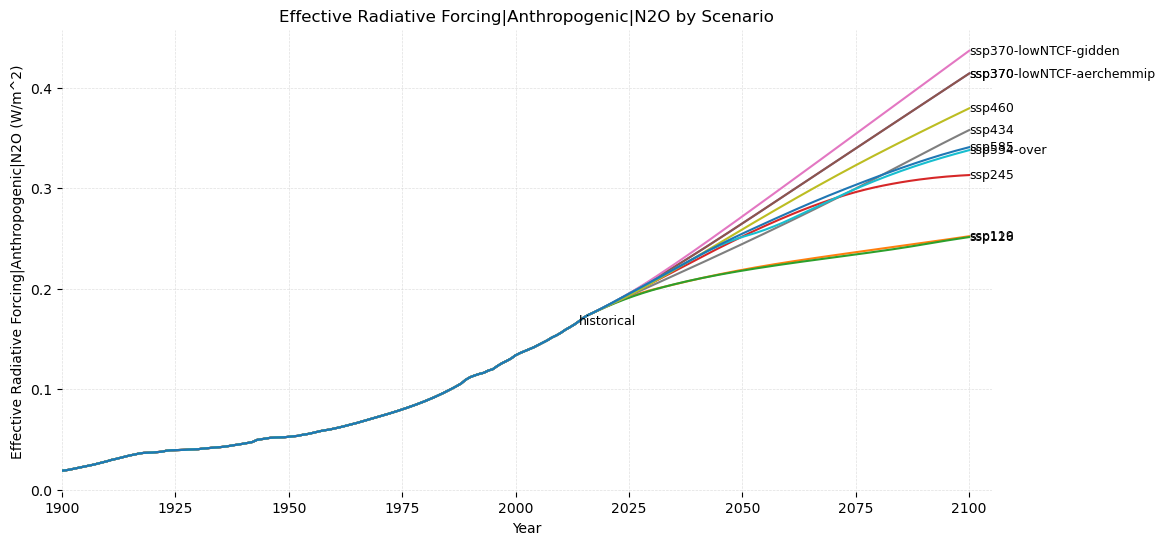

In [51]:
# List of variables to keep
variables_to_keep = [
    "Effective Radiative Forcing|Anthropogenic|CH4",
    "Effective Radiative Forcing|Anthropogenic|CO2",
    "Effective Radiative Forcing|Anthropogenic|N2O"
]

# Filter the DataFrame by variable
df_forc_filtered = df_forc[df_forc['Variable'].isin(variables_to_keep)]

# Filter the DataFrame by region
df_forc_filtered = df_forc_filtered[df_forc_filtered['Region'] == 'World']

# Define year range
start_year = 1900
end_year = 2100

# Get columns that are years within the range, plus any identifier columns you want to keep
year_columns = [str(year) for year in range(start_year, end_year + 1)]
identifier_columns = ['Model', 'Scenario', 'Region', 'Variable', 'Unit']  # adjust as needed

# Only keep columns that exist in the DataFrame
columns_to_keep = [col for col in identifier_columns if col in df_forc_filtered.columns] + \
                  [col for col in year_columns if col in df_forc_filtered.columns]

df_forc_filtered = df_forc_filtered[columns_to_keep]

# Display the filtered DataFrame
#print("Filtered Forcing (1900-2100):")
#display(df_forc_filtered)

#Visualize
# To compare CO2 emissions for scenario "rcp60"
plot_scenario_comparison(df_forc_filtered, "Effective Radiative Forcing|Anthropogenic|N2O")


## Save Scenario Inputs

In [42]:
df_conc_filtered.to_csv('Vensim_Runs/inputs_concentrations.csv', index=False)
df_emis_filtered.to_csv('Vensim_Runs/inputs_emissions.csv', index=False)
df_forc_filtered.to_csv('Vensim_Runs/inputs_forcing.csv', index=False)
